# Análisis y modelo desafío propuesto Data Scientist 
### Realizado por Mauricio Rocha L
### correo: m.andres.rocha@gmail.com
### telefono: +56 990957207
### github:  https://github.com/andres-rocha

Un problema de regresión consiste en predecir una variable de respuesta continua y en función de varias variables de entrada x, en general el valor predicho se denota por $\hat{y}$. De este modo nuestro modelo f sería: 

\begin{align}
\hat{y}=f(x)
\end{align}
  

En Geoestadística se utiliza una variación de este problema que consiste en modelar una variable que
es medida en un espacio geográfico. En este caso se busca predecir la variable en una ubicación usando como
variables de entrada muestras en otras ubicaciones.

<img src="geo1.png">

Aquí vamos a utilizar la notación $z(x)$ para denotar el valor de la variable $z$ medido en la posición $x$. En
caso de estimar el punto central de la imagen con un regresor lineal, la predicción tendría la siguiente forma:  

\begin{align*}
\hat{z}(x_{0})=\sum_{i=1}^{n} \lambda_{i}z(x_{i})
\end{align*}

Donde $x_{0}$ es la ubicación objetivo y $z(x_{i})$ son las mediciones disponibles en otras ubicaciones. Para unificar
la notación la variable de respuesta en este caso sería:  

\begin{align*}
\hat{y}=\hat{z}(x_{0})
\end{align*}


y las variables de entrada  


\begin{align*}
z(x_{1}), z(x_{2}), ... ,z(x_{n})
\end{align*}


El modelamiento geoestadístico cobra mayor relevancia cuando existe continuidad espacial en los datos.
Basado en la intuición de que los datos cercanos entre sí deberían ser similares, un regresor simple consiste en
asignar los ponderadores inversamente proporcional a la distancia.  
Si denotamos la distancia entre $x$ e $y$ como $d(x,y), el regresor de inverso de la distancia es el siguiente:  

\begin{align*}
\hat{z}(x_{0})=\sum_{i=1}^{n} (d(x_{0},x_{i}))^{n} z(x_{i})
\end{align*}

donde el exponente $a$ un entero negativo, el cual es un hiper parámetro del método (de aquí viene el
nombre de inverso de la distancia).

Problema
Junto a esta prueba se adjunta una base de datos georreferenciada en formato csv con muestras de suelo
y diferentes mediciones de variables de concentraciones de elementos químicos, Co denota cobalto.
El objetivo de este ejercicio es modelar el cobalto y construir un regresor. Se le pide lo siguiente:

1- Leave One Out
Implementar el método de validación cruzada Leave One Out, esto es equivalente a un $k Fold$ con $k=n$
para el inverso de la distancia al cuadrado $(a=2)$
Obs: Debe usar solo los datos de cobalto en esta etapa.

2.- Análisis de resultados
Evalúe los resultados del regresor de forma breve y presente el análisis en el formato que más le acomode
(documento, PPT, Jupyter, etc).
En su opinión. Es un buen regresor? .Por qué? .Cómo se podría mejorar?

3.-  Propuesta de regresor
Repita ambos ejercicios anteriores con un regresor propuesto por usted y esta vez puede incorporar el
resto de variables en el modelamiento. ¿Cómo se comparan estos resultados con el caso anterior (inverso de la
distancia)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#### Para correr notebook, poner archivo 'DatasetGrades.xlsx' en el mismo directorio que el archivo notebook_geostadistica.ipynb

In [2]:
path = ('DatasetGrades.xlsx') # Importamos archivo excel y leemos la hoja con los datos
xl = pd.ExcelFile(path)
print(xl.sheet_names)

['Datos_Jura_Limpios']


In [3]:
df = pd.read_excel('DatasetGrades.xlsx', 'Datos_Jura_Limpios') #guardamos datos como pandas Dataframe
df

,Este[m],Norte[m],Cd,Zn,Cu,Ni,Cr,Co,Pb
0,491,1862,2.415,49.2,21.32,18.16,32.72,7.88,48.40
1,626,1652,0.375,46.4,4.20,14.40,33.32,7.28,37.12
2,701,1997,1.580,86.0,9.84,32.20,60.80,12.60,64.80
3,836,1787,0.825,80.4,12.96,22.84,40.80,14.32,50.00
4,912,2132,2.200,78.4,11.88,30.80,60.40,10.48,51.60
...,...,...,...,...,...,...,...,...,...
354,4750,1369,0.775,70.8,17.60,23.76,35.60,11.96,32.92
355,4781,1375,0.810,58.8,12.08,20.84,27.44,10.88,36.28
356,4788,1647,0.720,63.2,11.40,26.72,34.08,8.80,32.68
357,4840,1089,0.555,64.8,10.80,19.60,27.64,10.28,36.52


In [4]:
df = df.drop(['Cd','Zn', 'Cu', 'Ni', 'Cr', 'Pb'], axis=1) # eliminamos columnas que no se utilizarán para el análisis

In [5]:
df.head()

,Este[m],Norte[m],Co
0,491,1862,7.88
1,626,1652,7.28
2,701,1997,12.60
3,836,1787,14.32
4,912,2132,10.48


In [6]:
df.shape

(359, 3)

In [7]:
is_NaN=df.isnull() #verificamos datos nulos
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [8]:
df.info() #verificamos tipo de variables de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Este[m]   359 non-null    int64  
 1   Norte[m]  359 non-null    int64  
 2   Co        359 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.5 KB


In [9]:
df.rename(columns = {'Este[m]':'Este', 'Norte[m]':'Norte'}, inplace = True) # cambiamos nombre de las tablas

In [10]:
df.head()

,Este,Norte,Co
0,491,1862,7.88
1,626,1652,7.28
2,701,1997,12.60
3,836,1787,14.32
4,912,2132,10.48


In [11]:
df.describe() #pequeño resumen estadistico de las variables

,Este,Norte,Co
count,359.000000,359.000000,359.000000
mean,2963.384401,2631.768802,9.439086
std,980.821519,1269.089389,3.568250
min,491.000000,524.000000,1.552000
25%,2260.500000,1510.500000,6.660000
50%,3040.000000,2489.000000,9.840000
75%,3674.000000,3652.000000,12.100000
max,4920.000000,5690.000000,20.600000


In [12]:
import os # se realizará a través del algoritmo alpha-shape el contorno de los datos
import sys
import pandas as pd
import numpy as np
from descartes import PolygonPatch
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape

In [13]:
points_2d = []

In [14]:
for index, row in df.iterrows():
    points_2d.append((row['Este'], row['Norte']))

In [15]:
points_2d=np.array(points_2d)

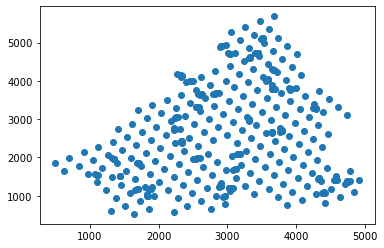

In [16]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
plt.show() # grafica de los puntos dados (sólo posiciones geográficas)

In [17]:
# algoritmo alpha-shape. Es un algoritmo que permite dibujar el contorno de una nube de puntos en varias dimensiones
# se escoge un valor para alpha = 300 para que las esferas o bolas creadas sólo consideren el contorno de los datos. es un
# parametro del algoritmo. La funcion retorna los puntos del borde como indices

from scipy.spatial import Delaunay
import numpy as np


def alpha_shape(points, alpha, only_outer=True):
   
    assert points.shape[0] > 3 # requiere mas de 3 puntos

    def add_edge(edges, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it is not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
 
    for ia, ib, ic in tri.simplices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
       
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

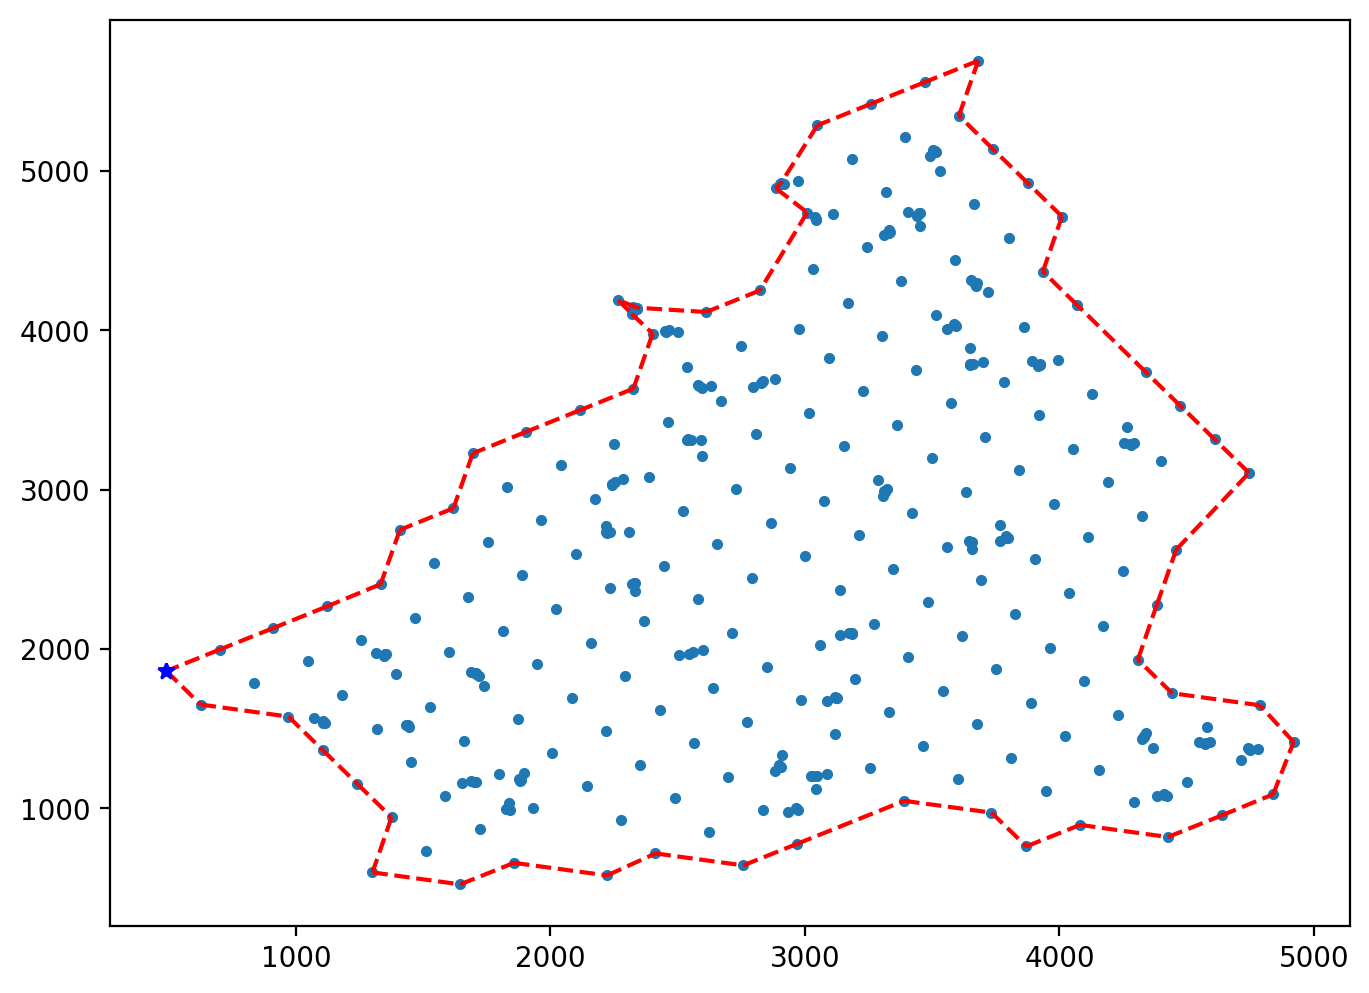

In [18]:
from matplotlib.pyplot import *

points = points_2d
edges = alpha_shape(points_2d, alpha=300, only_outer=True)
figure(figsize=(8, 6), dpi=200)
plot(points_2d[:, 0], points_2d[:, 1], '.')
for i, j in edges:
    plot(points_2d[[i, j], 0], points_2d[[i, j], 1], 'r--')
plot(491,1862,'b*')
show()


In [19]:
edges #cada valor representa el indice de puntos. Cada par ordenado nos indica el origen y termino de destino 
# de cada segmento. el par (a,b) significa que el segmento o borde parte en el punto de indice a y termina en el punto 
# de indice b

{(0, 1),
 (1, 5),
 (2, 0),
 (4, 2),
 (5, 8),
 (8, 14),
 (12, 4),
 (14, 23),
 (16, 37),
 (19, 12),
 (23, 16),
 (25, 19),
 (36, 25),
 (37, 59),
 (43, 36),
 (59, 82),
 (66, 43),
 (75, 66),
 (82, 108),
 (90, 96),
 (96, 107),
 (98, 75),
 (102, 90),
 (107, 98),
 (108, 143),
 (133, 102),
 (143, 168),
 (148, 133),
 (157, 174),
 (159, 157),
 (161, 159),
 (168, 225),
 (174, 148),
 (184, 161),
 (208, 184),
 (225, 276),
 (236, 208),
 (254, 271),
 (271, 236),
 (276, 290),
 (277, 254),
 (290, 309),
 (291, 277),
 (299, 304),
 (304, 291),
 (308, 299),
 (309, 338),
 (324, 333),
 (330, 308),
 (333, 340),
 (338, 349),
 (339, 324),
 (340, 353),
 (341, 330),
 (348, 341),
 (349, 357),
 (353, 348),
 (356, 339),
 (357, 358),
 (358, 356)}

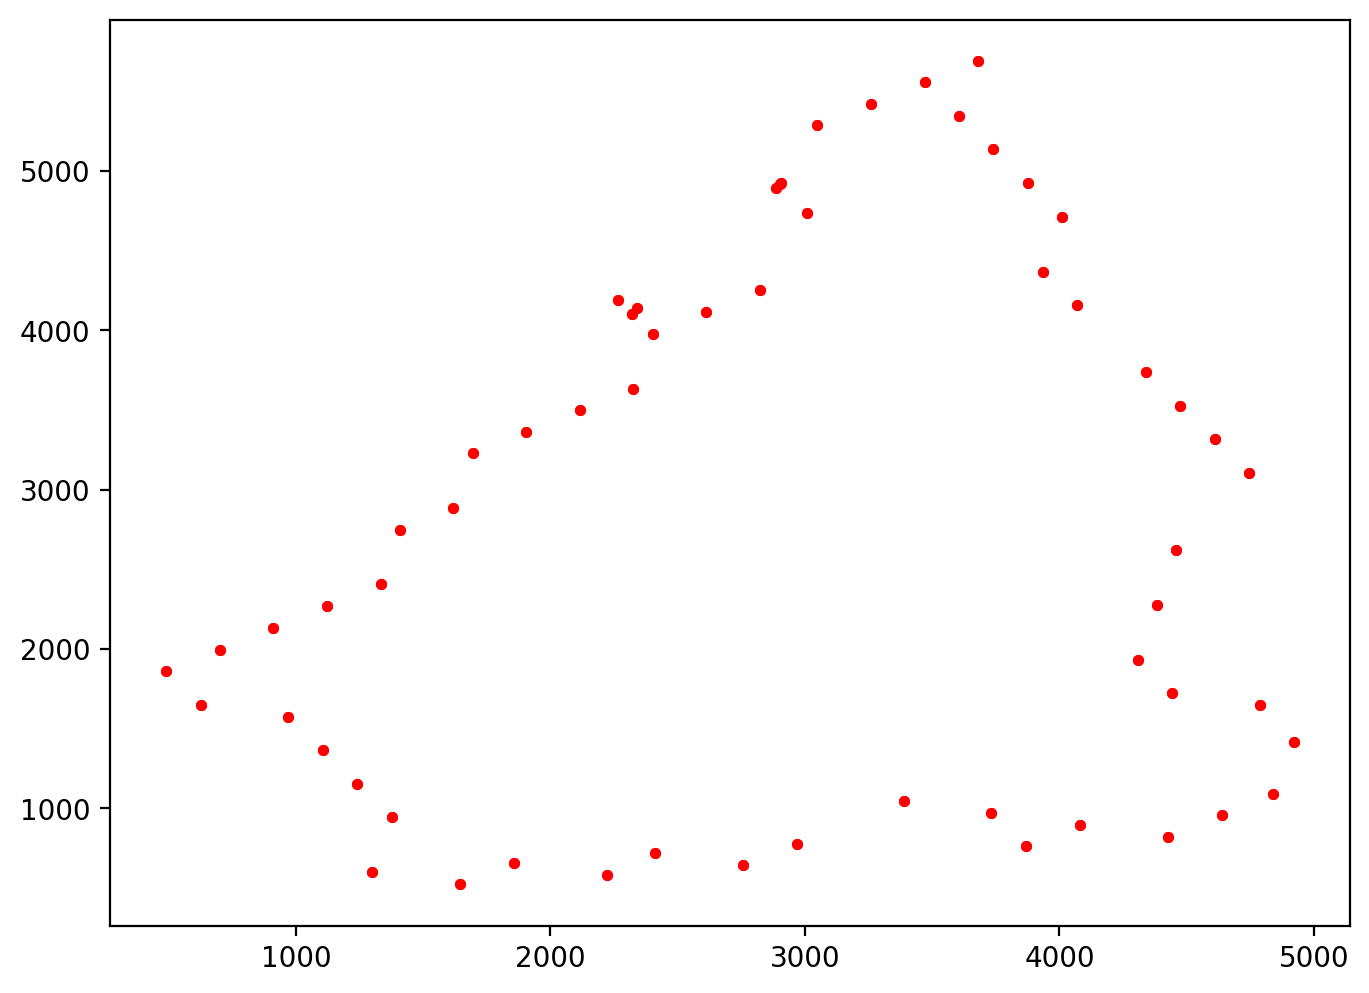

In [20]:
figure(figsize=(8, 6), dpi=200)
for i, j in edges:
    plot(points_2d[[i, j], 0], points_2d[[i, j], 1], 'r.')
show()

In [21]:
a=[] # se crea una lista para guardar los indices de los bordes

In [22]:
for i,j in edges:
    a.append(i)
    a.append(j)

In [23]:
a=np.array(a)

In [24]:
a=np.unique(a) #como los puntos de los borden son definidos por segmentos, es decir desde el punto de inicio
# al punto de termino, van a existir puntos repetidos por lo que se elminan los repetidos

In [25]:
a

array([  0,   1,   2,   4,   5,   8,  12,  14,  16,  19,  23,  25,  36,
        37,  43,  59,  66,  75,  82,  90,  96,  98, 102, 107, 108, 133,
       143, 148, 157, 159, 161, 168, 174, 184, 208, 225, 236, 254, 271,
       276, 277, 290, 291, 299, 304, 308, 309, 324, 330, 333, 338, 339,
       340, 341, 348, 349, 353, 356, 357, 358], dtype=int32)

In [26]:
len(a) # son 60 puntos los que definen el borde

60

In [27]:
b=points_2d # guardamos todos los puntos interiores en la lista b para un posterior análisis

In [28]:
b=np.delete(b, a, axis=0)

In [29]:
b.shape

(299, 2)

In [30]:
df.head()

,Este,Norte,Co
0,491,1862,7.88
1,626,1652,7.28
2,701,1997,12.60
3,836,1787,14.32
4,912,2132,10.48


In [31]:
# función que calcula la distancia entre un punto dado y todos los restantes. Se consideran para este análisis los 4 puntos mas 
# cercanos como en la figura del desafio (pdf)
def near_distance(indice):
    lista=[]
    lista_pos=[]
    x0=points_2d[indice][0]
    y0=points_2d[indice][1]
    for i in range(0,359):
        if i != indice:
            x1=points_2d[i][0]
            y1=points_2d[i][1]
            distance=np.sqrt((x0-x1)**2+(y0-y1)**2)
            lista.append(distance)
            lista_pos.append(i)
    df1=pd.DataFrame({'indice': lista_pos, 'distancia': lista})
    df1=df1.sort_values(by=['distancia'])
    df1=df1[0:4]
    df1=df1.reset_index(drop=True)
    return df1



In [32]:
# son enviados cada punto a la funcion distancia definida en la celda anterior. Se consideran sólo las 4 distancias mas cercanas
for i in range(0,359):
    df1=near_distance(i)
    
    df.at[i,'first_near'] = df1['distancia'][0]
    df.at[i,'index1'] = df1['indice'][0]
    
    df.at[i,'sec_near'] = df1['distancia'][1]
    df.at[i,'index2'] = df1['indice'][1]
    
    df.at[i,'third_near'] = df1['distancia'][2]
    df.at[i,'index3'] = df1['indice'][2]
    
    df.at[i,'fourth_near'] = df1['distancia'][3]
    df.at[i,'index4'] = df1['indice'][3]

In [33]:
#se guardaron los 4 puntos cercanos correspondientes (leave one out) a cada valor, sin considerar el punto estudiado
# son guardadas las 4 distancias en orden de proximidad en las columnas [first_near, sec_near, ...] y los indices
# de los puntos cercanos
df 

,Este,Norte,Co,first_near,index1,sec_near,index2,third_near,index3,fourth_near,index4
0,491,1862,7.88,249.649755,1.0,249.649755,2.0,353.058069,3.0,500.140980,4.0
1,626,1652,7.28,249.649755,0.0,249.649755,3.0,353.058069,2.0,353.271850,5.0
2,701,1997,12.60,249.649755,0.0,249.649755,3.0,250.491517,4.0,353.058069,1.0
3,836,1787,14.32,249.649755,1.0,249.649755,2.0,250.491517,5.0,250.491517,6.0
4,912,2132,10.48,249.649755,6.0,249.649755,12.0,250.491517,2.0,353.058069,15.0
...,...,...,...,...,...,...,...,...,...,...,...
354,4750,1369,11.96,5.830952,352.0,14.422205,351.0,31.575307,355.0,76.537572,350.0
355,4781,1375,10.88,31.575307,354.0,36.124784,352.0,39.458839,351.0,99.764723,350.0
356,4788,1647,8.80,249.649755,346.0,265.186727,358.0,269.948143,351.0,272.090059,355.0
357,4840,1089,10.28,242.689102,349.0,247.987903,350.0,292.022259,355.0,294.108823,354.0


In [34]:
#creamos la columna predict que corresponde al calculo de la distancia segun la formula otorgada en el pdf
# observar que p es la potencia de la distancia. Si se ingresan valores positivos para p, la potencia está en el denominador
# por lo que tomaria valores negativos como en la formula dada
p=2
for i in range(0,359):
    df.at[i,'predict_Co'] = ((1/(df['first_near'][i])**p)*df['Co'][df['index1'][0]] + (1/(df['sec_near'][i])**p)*df['Co'][df['index2'][0]] + (1/(df['third_near'][i])**p)*df['Co'][df['index3'][0]] + (1/(df['fourth_near'][i])**p)*df['Co'][df['index4'][0]])

In [35]:
df.head(50)

,Este,Norte,Co,first_near,index1,sec_near,index2,third_near,index3,fourth_near,index4,predict_Co
0,491,1862,7.88,249.649755,1.0,249.649755,2.0,353.058069,3.0,500.140980,4.0,0.000476
1,626,1652,7.28,249.649755,0.0,249.649755,3.0,353.058069,2.0,353.271850,5.0,0.000518
2,701,1997,12.60,249.649755,0.0,249.649755,3.0,250.491517,4.0,353.058069,1.0,0.000631
3,836,1787,14.32,249.649755,1.0,249.649755,2.0,250.491517,5.0,250.491517,6.0,0.000714
4,912,2132,10.48,249.649755,6.0,249.649755,12.0,250.491517,2.0,353.058069,15.0,0.000631
5,971,1576,10.08,100.404183,7.0,137.873130,9.0,143.003496,10.0,148.761554,11.0,0.002559
6,1047,1922,14.20,249.649755,15.0,249.649755,4.0,250.491517,13.0,250.491517,3.0,0.000714
7,1071,1567,9.96,39.824616,9.0,48.918299,10.0,53.600373,11.0,100.404183,5.0,0.015879
8,1106,1366,3.96,169.011834,10.0,169.189243,11.0,182.000000,9.0,204.024508,7.0,0.001379
9,1106,1548,9.16,13.152946,10.0,15.264338,11.0,39.824616,7.0,137.873130,5.0,0.105738


In [36]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(df['Co'], df['predict_Co'])
MSE

100.49287357395106

In [37]:
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

10.024613387754714


#### Observamos que el error cuadratico medio para la formula propuesta es de 9.95


#### Se propone el siguiente modelo, donde se considera agregar en el numerador, la suma de las distancias de los puntos mas cercanos al punto a predecir.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9c43e9b1f84cc8b358947e4582eb210886c98b4d" alt="Alternative text" />

In [38]:
# creamos una nueva columna llamanda predict1 con esta nuevo modelo propuesto
p=2
for i in range(0,359):
    suma=1/df['first_near'][i]**p + 1/df['sec_near'][i]**p+1/df['third_near'][i]**p+1/df['fourth_near'][i]**p
    df.at[i,'predict1_Co'] = ((1/(df['first_near'][i])**p)*df['Co'][df['index1'][0]] + (1/(df['sec_near'][i])**p)*df['Co'][df['index2'][0]] + (1/(df['third_near'][i])**p)*df['Co'][df['index3'][0]] + (1/(df['fourth_near'][i])**p)*df['Co'][df['index4'][0]])/suma

In [39]:
df.head()

,Este,Norte,Co,first_near,index1,sec_near,index2,third_near,index3,fourth_near,index4,predict_Co,predict1_Co
0,491,1862,7.88,249.649755,1.0,249.649755,2.0,353.058069,3.0,500.140980,4.0,0.000476,10.785548
1,626,1652,7.28,249.649755,0.0,249.649755,3.0,353.058069,2.0,353.271850,5.0,0.000518,10.760056
2,701,1997,12.60,249.649755,0.0,249.649755,3.0,250.491517,4.0,353.058069,1.0,0.000631,11.262711
3,836,1787,14.32,249.649755,1.0,249.649755,2.0,250.491517,5.0,250.491517,6.0,0.000714,11.165860
4,912,2132,10.48,249.649755,6.0,249.649755,12.0,250.491517,2.0,353.058069,15.0,0.000631,11.262711


In [40]:
MSE = mean_squared_error(df['Co'], df['predict1_Co'])
MSE

14.247617476585619

In [41]:
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

3.774601631508366


#### Oservamos que el RMSE se reduce a 3.80 con el modelo propuesto

358


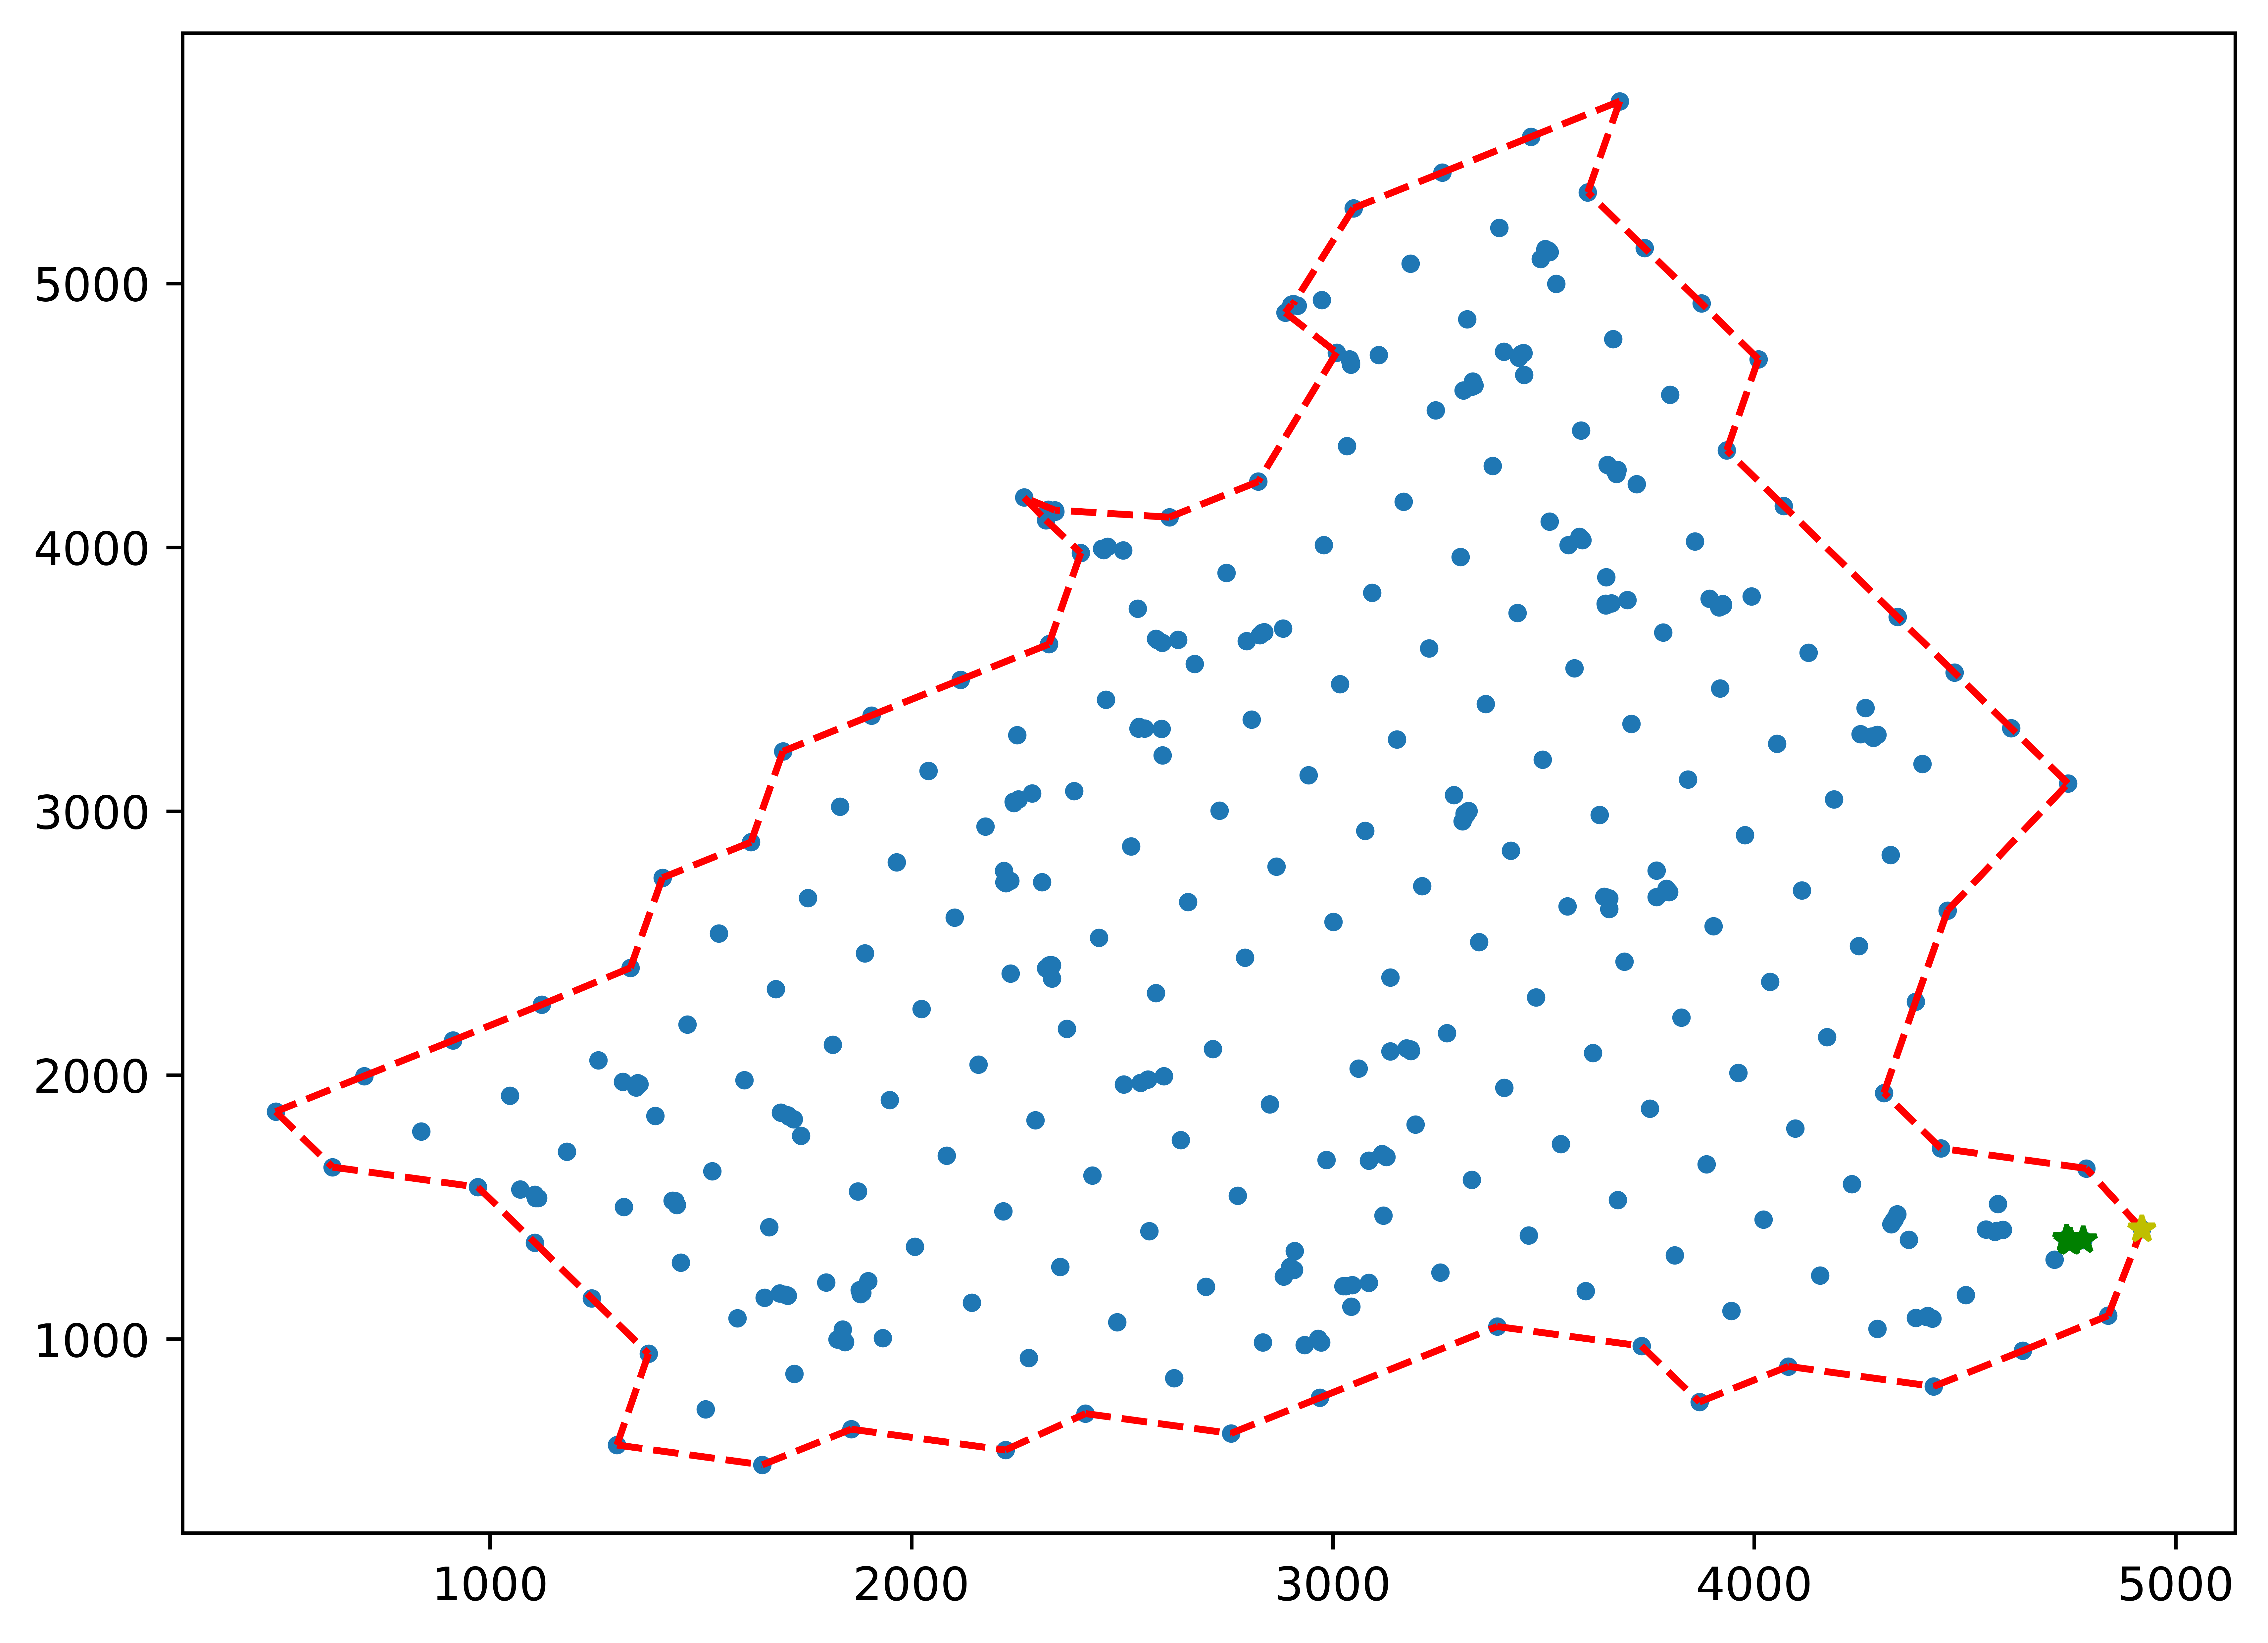

In [42]:
# grafico de validacion de vecinos cercanos. k es el indice de cualquier punto (0,358) y en este caso está como parámetro random
# observar que cualquiera sea el valor de este, el algoritmo nos trae los 4 puntos mas cercanos.
# pinta de amarillo el punto estudiado y en verde los puntos cercanos.
# puede fijar el valor de k o cambiarlo a gusto para evaluar algoritmo visualmente. 

from matplotlib.pyplot import *

points = points_2d
edges = alpha_shape(points_2d, alpha=300, only_outer=True)
figure(figsize=(8, 6), dpi=1000)
plot(points_2d[:, 0], points_2d[:, 1], '.')
for i, j in edges:
    plot(points_2d[[i, j], 0], points_2d[[i, j], 1], 'r--')

k=random.randint(0, 358) # posicion del punto para graficar vecinos mas cercanos se elige un punto al azar
print(k)
plot(df['Este'][df['index1'][k]],df['Norte'][df['index1'][k]],'g*')
plot(df['Este'][df['index2'][k]],df['Norte'][df['index2'][k]],'g*')
plot(df['Este'][df['index3'][k]],df['Norte'][df['index3'][k]],'g*')
plot(df['Este'][df['index4'][k]],df['Norte'][df['index4'][k]],'g*')
plot(df['Este'][k],df['Norte'][k],'y*')

show()

In [43]:
df_tot= pd.read_excel('DatasetGrades.xlsx', 'Datos_Jura_Limpios') #guardamos datos como pandas Dataframe

In [44]:
df_tot.head()

,Este[m],Norte[m],Cd,Zn,Cu,Ni,Cr,Co,Pb
0,491,1862,2.415,49.2,21.32,18.16,32.72,7.88,48.40
1,626,1652,0.375,46.4,4.20,14.40,33.32,7.28,37.12
2,701,1997,1.580,86.0,9.84,32.20,60.80,12.60,64.80
3,836,1787,0.825,80.4,12.96,22.84,40.80,14.32,50.00
4,912,2132,2.200,78.4,11.88,30.80,60.40,10.48,51.60


In [45]:
df.insert(3,'Zn',df_tot['Zn']) # Se realiza análisis para la variable Zn

In [46]:
df.head()

,Este,Norte,Co,Zn,first_near,index1,sec_near,index2,third_near,index3,fourth_near,index4,predict_Co,predict1_Co
0,491,1862,7.88,49.2,249.649755,1.0,249.649755,2.0,353.058069,3.0,500.140980,4.0,0.000476,10.785548
1,626,1652,7.28,46.4,249.649755,0.0,249.649755,3.0,353.058069,2.0,353.271850,5.0,0.000518,10.760056
2,701,1997,12.60,86.0,249.649755,0.0,249.649755,3.0,250.491517,4.0,353.058069,1.0,0.000631,11.262711
3,836,1787,14.32,80.4,249.649755,1.0,249.649755,2.0,250.491517,5.0,250.491517,6.0,0.000714,11.165860
4,912,2132,10.48,78.4,249.649755,6.0,249.649755,12.0,250.491517,2.0,353.058069,15.0,0.000631,11.262711


In [47]:
# se crea un predictor usando la formula dada y se guardan los valores en la columna predict_Zn
p=2
for i in range(0,359):
    df.at[i,'predict_Zn'] = ((1/(df['first_near'][i])**p)*df['Zn'][df['index1'][0]] + (1/(df['sec_near'][i])**p)*df['Zn'][df['index2'][0]] + (1/(df['third_near'][i])**p)*df['Zn'][df['index3'][0]] + (1/(df['fourth_near'][i])**p)*df['Zn'][df['index4'][0]])

In [48]:
# se crea un predictor usando la formula propuesta y se guardan los valores en la columna predict1_Zn
p=2
for i in range(0,359):
    suma=1/df['first_near'][i]**p + 1/df['sec_near'][i]**p+1/df['third_near'][i]**p+1/df['fourth_near'][i]**p
    df.at[i,'predict1_Zn'] = ((1/(df['first_near'][i])**p)*df['Zn'][df['index1'][0]] + (1/(df['sec_near'][i])**p)*df['Zn'][df['index2'][0]] + (1/(df['third_near'][i])**p)*df['Co'][df['index3'][0]] + (1/(df['fourth_near'][i])**p)*df['Co'][df['index4'][0]])/suma

In [49]:
df.head()

,Este,Norte,Co,Zn,first_near,index1,sec_near,index2,third_near,index3,fourth_near,index4,predict_Co,predict1_Co,predict_Zn,predict1_Zn
0,491,1862,7.88,49.2,249.649755,1.0,249.649755,2.0,353.058069,3.0,500.140980,4.0,0.000476,10.785548,0.003083,51.714421
1,626,1652,7.28,46.4,249.649755,0.0,249.649755,3.0,353.058069,2.0,353.271850,5.0,0.000518,10.760056,0.003398,48.274288
2,701,1997,12.60,86.0,249.649755,0.0,249.649755,3.0,250.491517,4.0,353.058069,1.0,0.000631,11.262711,0.004035,43.473030
3,836,1787,14.32,80.4,249.649755,1.0,249.649755,2.0,250.491517,5.0,250.491517,6.0,0.000714,11.165860,0.004655,39.390548
4,912,2132,10.48,78.4,249.649755,6.0,249.649755,12.0,250.491517,2.0,353.058069,15.0,0.000631,11.262711,0.004035,43.473030


In [50]:
# Calculamos error cuadratico medio con formula dada
MSE = mean_squared_error(df['Zn'], df['predict_Zn']) 
MSE

6638.422303564841

In [51]:
# RMSE obtenido para la formula dada
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

81.47651381573


In [52]:
# Calculamos error cuadratico medio con formula propuesta
MSE = mean_squared_error(df['Zn'], df['predict1_Zn'])
MSE

1872.7565708949119

In [53]:
# RMSE obtenido para la formula propuesta
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

43.27535754785755


| Modelo | Dado | Propuesto |
| --- | --- | --- |
| MSE Cobalto | 99.10 | 14.46 |
| RMSE Cobalto | 9.95 | 3.8 |
| MSE Zinc | 6562.29 | 1692 |
| RMSE Zinc | 81.00 | 41.13 |

#### Análisís final: Observamos que en ambas variables, tanto en la estimación de Zinc como de Cobalto, el modelo propuesto tiene un mejor desempeño que el dado ya que tiene valores mas bajos al comparar RMSE (RMSE = 0 prediccion perfecta). Por tiempo no se consideró ver el comportamiento del desempeño sacando los datos de los bordes ya que al evaluar estos datos, el modelo considerará los puntos cercanos interiores a la figura y esto puede aumentar el error, ya que se están estimando con los datos que se poseen y no con los datos reales (que no se cuentan al ser datos de la frontera). Es posible que quitando del estudio los datos de la frontera se consiga un mejor desempeño del modelo. También se tentaron algunos valores para la norma P (que en este notebook permite fijarlo) para P=1,2,3,10 y 20. Observandose que el mejor desempeño estaba en los valores entre 2 y 5. En este estudio sólo se consideraron los 4 vecinos mas cercanos a cada punto (como se mostraba en la imagen del pdf adjunto). También se puede analizar si el poderador tiene un mejor comportamiento considerando mas vecinos de cada punto. Topologicamente, se pueden considerar distintos bordes pero el algoritmo alpha-shape arrojo que para un radio de r=300 se obtenía una frontera bastante regular. También se pueden evaluar otras métricas que permite el Espacio Euclideano para la distancia que ajusten de mejor manera la predicción.